# Data Visualization
## Introduction:
WeRateDogs is a __[Twitter](https://en.wikipedia.org/wiki/Twitter)__  account which rates different __[dogs](https://en.wikipedia.org/wiki/Dog)__ with humorous comments. It was founded in 2015 by college student Matt Nelson who had received international media coverage both for its popularity and the attention drawn to __[social media](https://en.wikipedia.org/wiki/Social_media)__ __[copyright_law](https://en.wikipedia.org/wiki/Copyright_law)__ when it was suspended by Twitter.

These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "__[they're good dogs Brent](http://knowyourmeme.com/memes/theyre-good-dogs-brent)__." WeRateDogs has over 4 million followers and has received international media coverage.


In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from IPython.display import HTML
import matplotlib

In [264]:
df_master = pd.read_csv('twitter_archive_master.csv', encoding = 'utf-8')

In [265]:
# convert 'timestamp', 'date', 'time' column to datetime format
df_master.timestamp = pd.to_datetime(df_master.timestamp)
df_master.time = pd.to_datetime(df_master.time)
df_master.date = pd.to_datetime(df_master.date)

# order the table by time
df_master.sort_values('timestamp', inplace =True)

# reset the index
df_master = df_master.set_index('timestamp')

# convert data type in 'gender and 'stage' columns to category for later visualization
df_master.gender = df_master.gender.astype('category')
df_master.stage = df_master.stage.astype('category')

In [266]:
# add rating column
df_master['rating'] = df_master.rating_numerator/df_master.rating_denominator

# subset the dataframe for correlation heatmap 
df_master1 = df_master.drop(['date', 'time', 'tweet_id', 'jpg_url', 'name', \

                             'stage', 'predictions', 'img_num', 'followers_count', 'favourites_count'], axis = 1)

### Correlation with rating

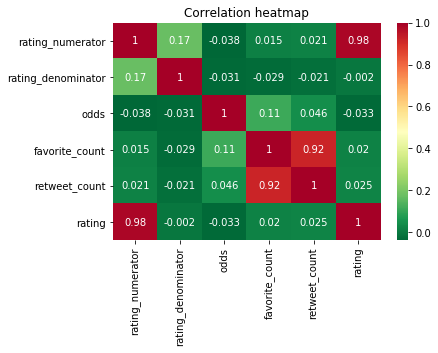

In [267]:
# correlation heatmap
corr = df_master1.corr()
plt.title('Correlation heatmap')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot = True,
           cmap='RdYlGn_r');

According to the above visualization:

- The strongest correlation associated with rating is rating_numerator, which is 0.98. That makes sense, because most rating denominators are 10, so higher rating numerator suggest better ratings, hence higher popularity;
- In addition, the strongest correlation among other pairs is 0.92 and lies between favorite_count and retweet_count, that is also plausible, it might due to that dogs which are more favored tend to receive more retweets;
- The weakest connection was found in rating and rating_denominator, whicih is -0.002, variables in this pair seems independent from each other.

### Retweet_count VS favorite_count

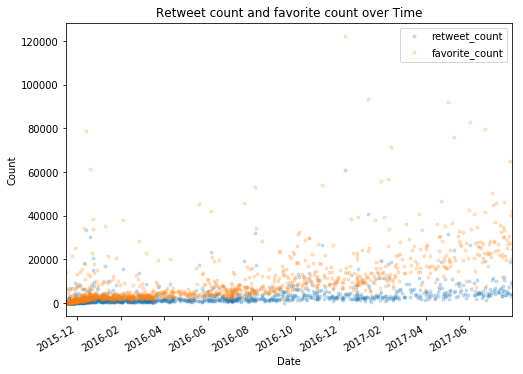

In [268]:
df_master.plot.line(y =['retweet_count', 'favorite_count'], style = '.', alpha = .2, figsize=(8,6))

plt.title('Retweet count and favorite count over Time')
plt.xlabel('Date')
plt.ylabel('Count');

In accordance with result from correlation heatmap, retweet count is positively related with favorite count over time. However, the favorite count increased faster than retweet count at the latter part of timeline.

### Top 10 predictions

In [269]:
df_master.sort_values('odds', ascending = False)[0:9][['predictions', 'odds']]

,predictions,odds
timestamp,,
2015-11-23 03:46:18,komondor,0.999956
2016-02-10 16:51:59,Labrador_retriever,0.999885
2016-03-15 02:25:31,chow,0.999837
2016-12-31 00:08:17,dalmatian,0.999828
2016-02-10 03:22:44,Great_Dane,0.999223
2017-07-15 23:25:31,French_bulldog,0.999201
2017-06-08 14:20:41,pug,0.999120
2015-11-19 20:14:03,Rottweiler,0.999091
2016-01-08 01:16:17,pug,0.999044


The top 10 predictions are shown above, and the odds are all above 0.9 which is very high percentage. That is probably due to their characteristic can easily be distinguished from other breeds. For instance, the top 1 prediction is Komondor, also known as the Hungarian sheepdog, is a large, white-coloured Hungarian breed of livestock guardian dog with a long, corded coat. The Komondor breed has been declared one of Hungary’s national treasures, to be preserved and protected from modification. So Komondor is famous and popular among folks, which made it easily recognizable. 

The last one in the top 10 predictions list is pug, that is a breed of dog with physically distinctive features of a wrinkly, short-muzzled face, and curled tail. The breed has a fine, glossy coat that comes in a variety of colours, most often fawn or black, and a compact square body with well-developed muscles. Pugs are known for being sociable and gentle companion dogs. The American Kennel Club describes the breed's personality as "even-tempered and charming". Pugs remain popular into the twenty-first century, with some famous celebrity owners. A pug was judged Best in Show at the World Dog Show in 2004.


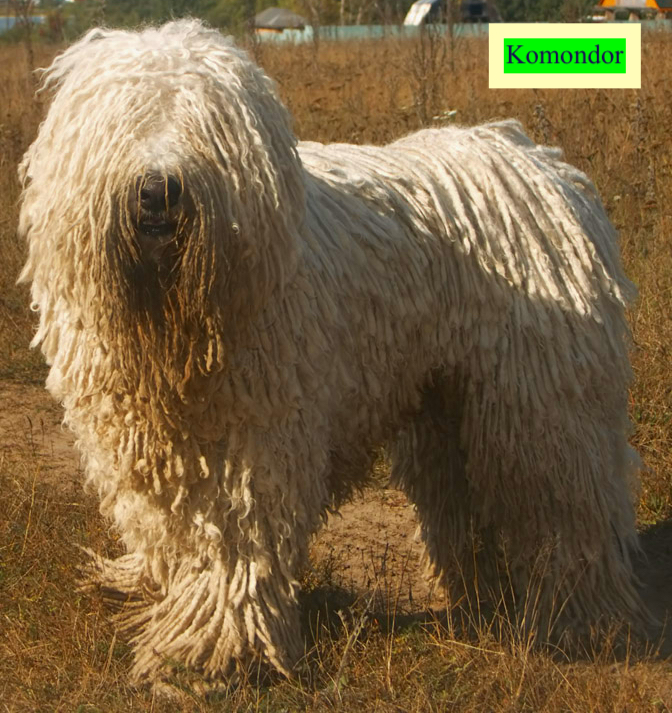

In [44]:
Image(filename="Komondor.jpg")

The above image is adapted from [Nikki68](https://commons.wikimedia.org/wiki/File:Komondor_delvin.jpg).

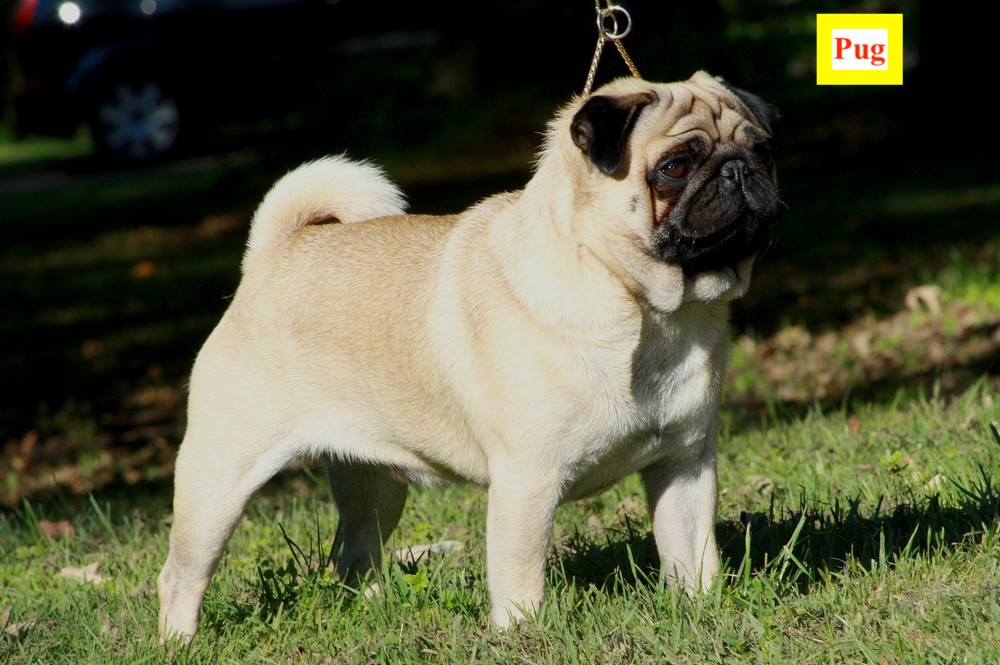

In [2]:
Image(filename="Pug.jpg")

The above image is adapted from [wikimedia](https://commons.wikimedia.org/wiki/File:Mops-duke-mopszucht-vom-maegdebrunnen.jpg).

In [272]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1299 entries, 2015-11-15 23:05:30 to 2017-07-31 00:18:03
Data columns (total 17 columns):
tweet_id              1299 non-null int64
rating_numerator      1277 non-null float64
rating_denominator    1299 non-null float64
name                  861 non-null object
date                  1299 non-null datetime64[ns]
time                  1299 non-null datetime64[ns]
stage                 204 non-null category
gender                860 non-null category
jpg_url               1299 non-null object
img_num               1299 non-null int64
predictions           1099 non-null object
odds                  1299 non-null float64
favorite_count        1299 non-null int64
retweet_count         1299 non-null int64
followers_count       1299 non-null int64
favourites_count      1299 non-null int64
rating                1277 non-null float64
dtypes: category(2), datetime64[ns](2), float64(4), int64(6), object(3)
memory usage: 165.4+ KB


### Descriptive statistics of the table

In [273]:
df_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,odds,favorite_count,retweet_count,followers_count,favourites_count,rating
count,1.299000e+03,1277.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.0,1299.0,1277.000000
mean,7.327014e+17,12.837118,10.545804,1.187067,0.460938,8262.740570,2515.806005,7070857.0,135451.0,1.223867
std,6.632790e+16,51.553379,7.874498,0.540746,0.338136,11420.680957,4026.139393,0.0,0.0,5.076635
min,6.660293e+17,1.000000,2.000000,1.000000,0.000000,80.000000,13.000000,7070857.0,135451.0,0.100000
25%,6.749026e+17,10.000000,10.000000,1.000000,0.140538,1714.500000,581.000000,7070857.0,135451.0,1.000000
50%,7.062660e+17,11.000000,10.000000,1.000000,0.456092,3821.000000,1261.000000,7070857.0,135451.0,1.100000
75%,7.791841e+17,12.000000,10.000000,1.000000,0.767926,10236.000000,2978.000000,7070857.0,135451.0,1.200000
max,8.918152e+17,1776.000000,170.000000,4.000000,0.999956,122431.000000,60729.000000,7070857.0,135451.0,177.600000


### Investigate the outlier 

In [274]:
df_master[df_master['rating_numerator'] == df_master['rating_numerator'].max()]

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage,gender,jpg_url,img_num,predictions,odds,favorite_count,retweet_count,followers_count,favourites_count,rating
timestamp,,,,,,,,,,,,,,,,,
2016-07-04 15:00:45,749981277374128128,1776.0,10.0,Atticus,2016-07-04,2018-07-20 15:00:45,NaN,male,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,NaN,0.0,5489,2695,7070857,135451,177.6


In [275]:
df_master[df_master['rating_denominator'] == df_master['rating_denominator'].max()]

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage,gender,jpg_url,img_num,predictions,odds,favorite_count,retweet_count,followers_count,favourites_count,rating
timestamp,,,,,,,,,,,,,,,,,
2016-05-13 16:15:54,731156023742988288,204.0,170.0,NaN,2016-05-13,2018-07-20 16:15:54,NaN,NaN,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,NaN,0.0,4077,1384,7070857,135451,1.2


In [276]:
df_master[df_master['favorite_count'] == df_master['favorite_count'].max()]

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage,gender,jpg_url,img_num,predictions,odds,favorite_count,retweet_count,followers_count,favourites_count,rating
timestamp,,,,,,,,,,,,,,,,,
2016-12-09 06:17:20,807106840509214720,13.0,10.0,Stephan,2016-12-09,2018-07-20 06:17:20,NaN,male,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.50537,122431,60729,7070857,135451,1.3


In [277]:
df_master[df_master['favorite_count'] == df_master['favorite_count'].min()]

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage,gender,jpg_url,img_num,predictions,odds,favorite_count,retweet_count,followers_count,favourites_count,rating
timestamp,,,,,,,,,,,,,,,,,
2015-11-16 03:55:04,666102155909144576,11.0,10.0,NaN,2015-11-16,2018-07-20 03:55:04,NaN,NaN,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,English_setter,0.298617,80,13,7070857,135451,1.1


In [278]:
df_master[df_master['retweet_count'] == df_master['retweet_count'].max()]

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage,gender,jpg_url,img_num,predictions,odds,favorite_count,retweet_count,followers_count,favourites_count,rating
timestamp,,,,,,,,,,,,,,,,,
2016-12-09 06:17:20,807106840509214720,13.0,10.0,Stephan,2016-12-09,2018-07-20 06:17:20,NaN,male,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.50537,122431,60729,7070857,135451,1.3


In [279]:
df_master[df_master['retweet_count'] == df_master['retweet_count'].min()]

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage,gender,jpg_url,img_num,predictions,odds,favorite_count,retweet_count,followers_count,favourites_count,rating
timestamp,,,,,,,,,,,,,,,,,
2015-11-16 03:55:04,666102155909144576,11.0,10.0,NaN,2015-11-16,2018-07-20 03:55:04,NaN,NaN,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,English_setter,0.298617,80,13,7070857,135451,1.1


In [280]:

df_master[df_master['rating'] == df_master['rating'].max()]

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage,gender,jpg_url,img_num,predictions,odds,favorite_count,retweet_count,followers_count,favourites_count,rating
timestamp,,,,,,,,,,,,,,,,,
2016-07-04 15:00:45,749981277374128128,1776.0,10.0,Atticus,2016-07-04,2018-07-20 15:00:45,NaN,male,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,NaN,0.0,5489,2695,7070857,135451,177.6


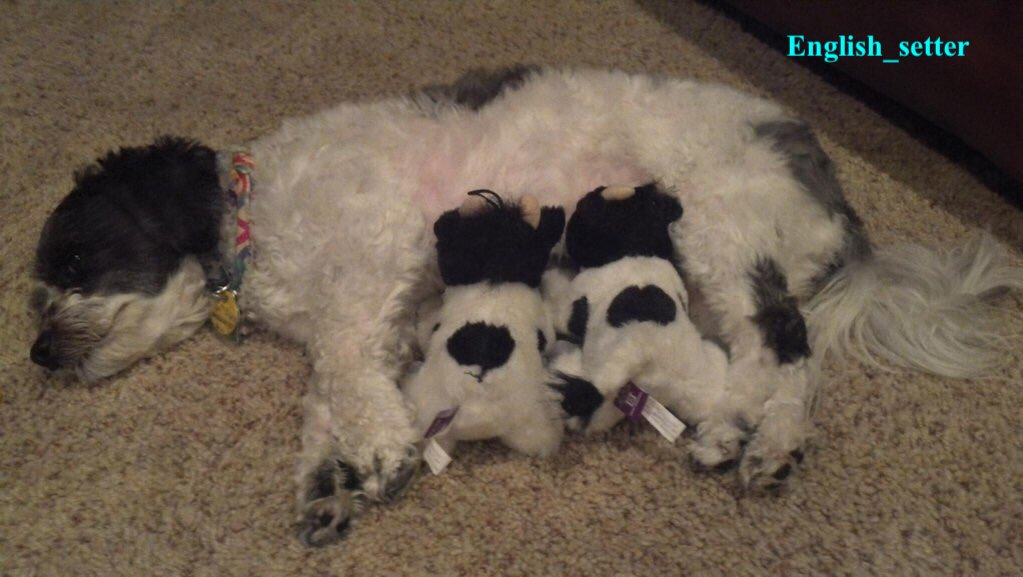

In [281]:
Image(filename="English_setter.jpg")

The above image is adapted from [here](https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg).

Using programmatical code, we are able to view specific portions and summaries of the data. According to the outliers presented above, a male dog named Atticus received the highest rating_numerator score which is 1776 as well as highest ratings score 177.6. Such findings again support rating_numerator is positively correlated with ratings. The highest rating_denominator score is 170, but unfortunately there is not much we can tell from the descriptive statistics.

A male Chihuahua named Stephan received the highest favorite count (122431) as well as highest retweet count (60729), respectively, surprisingly, the same dog of English_setter breed received the least favorite count (80) and least retweet count (13), notwithstanding, we are still in the dark regarding the rest information.

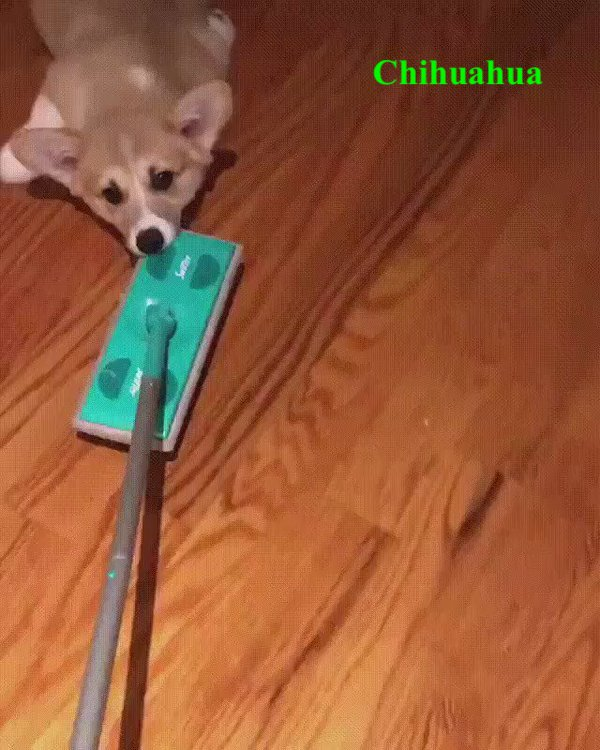

In [282]:
Image(filename="Chihuahua.jpg")

The above image is adapted from [here]( https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg).

### Top 10 rating dog names

In [283]:
# firstly, exclude rows in which dog names are missing
# then select the rows of which contain the top 10 rating dog names, but we don't take the outlier into consideration 
# this time
top10_rating = df_master.query('name == name').sort_values('rating', ascending = False)[1:10]

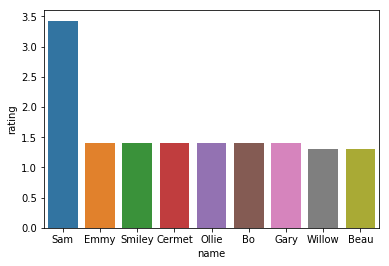

In [284]:
sns.barplot(x="name", y="rating", data=top10_rating);

The top 10 rating dog names are very common, such as logan, sam, sophie, etc., this rank is also the reflection of names's popularity among people.

### Gender composition

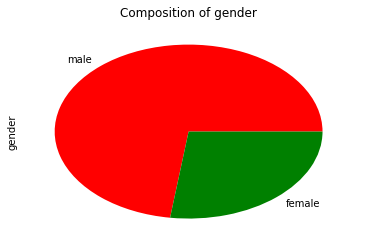

In [285]:
# exclude NA value first and then visualize the gender composition
df_master[df_master.gender.notnull()].gender.value_counts().plot(kind = 'pie', colors=tuple(["r", "g"]));
plt.title('Composition of gender');

The gender composition denoted that male almost consists of 75% of the total dogs whereas female take over around 25%. The reason could be related with a lot of factors, such as behavioral differences, physical characteristics, geographical location, etc. We can't go further with limited data on hand.

### Stage composition

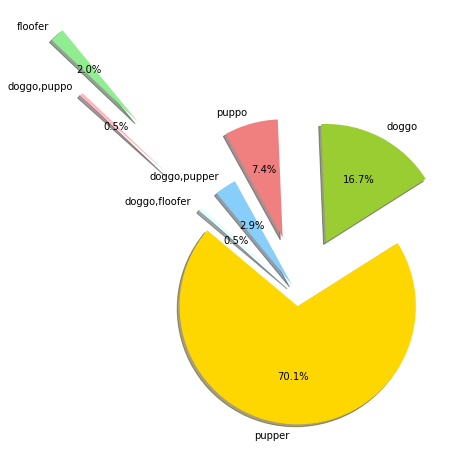

In [286]:
# exclude NA value first and then visualize the stage composition
labels = df_master[df_master.stage.notnull()].stage.value_counts().index.tolist()
sizes = df_master[df_master.stage.notnull()].stage.value_counts().tolist()

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink', 'lightcyan']
#cs=cm.Set1(np.arange(40)/40.)
explode = (0.1, 0.5, 0.5, 0.1, 2, 1.5, 0.1)  # explode 1st slice

 
# Plot
plt.figure(figsize=(8, 8))
matplotlib.rcParams['font.size'] = 10
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show();

Pupper takes over the largest number of our pie, I guess people tend to post their dogs at the bouncing baby stage, during which dogs are quiet, tender and cute.

### Boxplot of stage with ratings

/Users/shilinli/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


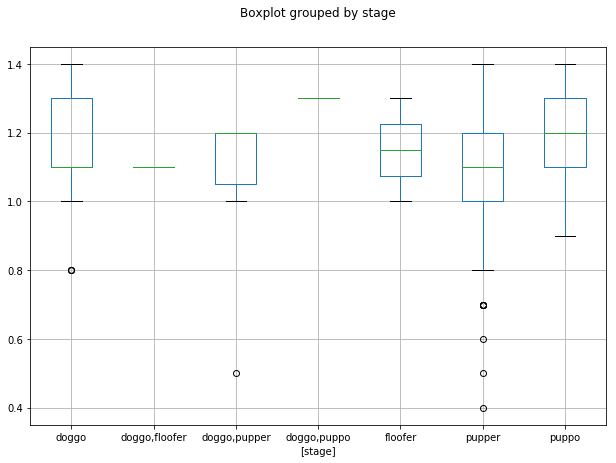

In [291]:
# Plot the dog stages with ratings
df_master[df_master['stage'].notnull()].boxplot(column = ['rating'], by = ['stage'], figsize=(10, 7))
plt.title('');

However, pupper is not the most popular stage according to rating, whereas the doggo and puppo on average are on the top list.

### Stage VS prediction odds

/Users/shilinli/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


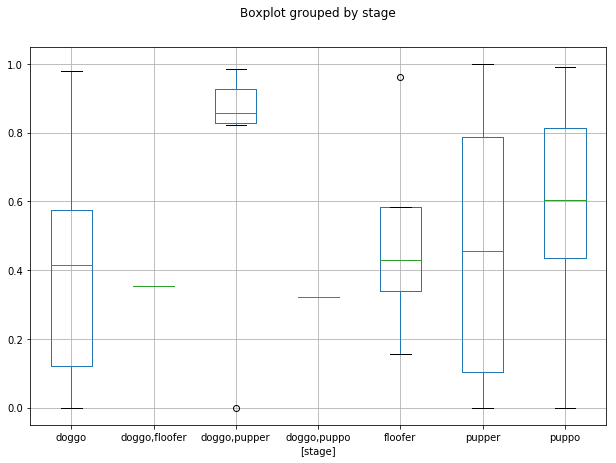

In [292]:
df_master[df_master['stage'].notnull()].boxplot(column = ['odds'], by = ['stage'], figsize=(10, 7))
plt.title('');

Combination stage of doggo and puppo is correlated with the most accurate prediction odds among the all the potential stages，and it is much higher even than puppo which stand at the second place.

# Conclusion
To sum up, a male dog named Atticus received the highest rating_numerator score 1776 as well as highest ratings score 177.6. A male Chihuahua named Stephan received the highest favorite count (122431) as well as highest retweet count (60729), respectively, surprisingly, the same dog of English_setter breed received the least favorite count (80) and least retweet count (13), notwithstanding, we are still in the dark regarding the rest information.

The names associated with higher ratings might be depend on its popularity. Male dogs seem more favored on the market. Even pupper takes over 70.1% of all stages, however, highest rating is correlated with doggo and puppo. Taking about the prediction odds, the highest accuracy lies in the combination stage of doggo and puppo.

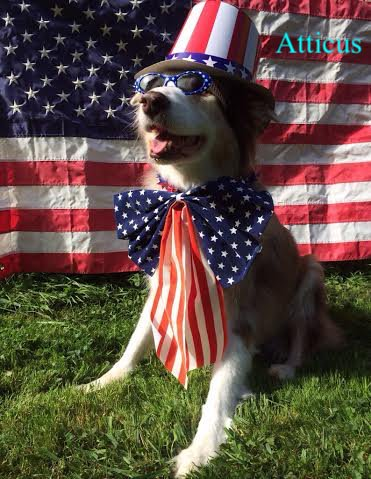

In [293]:
Image(filename="Atticus.jpg")

The above image is adapted from [here]( https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
).


In [290]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')
